# 使用 svd 对鸢尾花（Iris）数据集降维

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# ========== 修复中文显示核心代码 ==========
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # Windows: 黑体'SimHei'; macOS: 'Arial Unicode MS'; Linux: 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示为方块的问题

In [51]:
# 1. 加载并预处理数据
iris = load_iris()
X = iris.data  # 特征矩阵 (150, 4)
y = iris.target  # 标签 (150,)
feature_names = iris.feature_names
target_names = iris.target_names

In [64]:
print(X[:5], '\n\n', y, '\n\n', feature_names, '\n\n', target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] 

 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

 ['setosa' 'versicolor' 'virginica']


In [53]:
# 标准化（SVD对尺度敏感，必须标准化）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
# 2. 执行SVD分解
U, S, VT = np.linalg.svd(X_scaled, full_matrices=False)
# U: (150,4), S: (4,), VT: (4,4)

In [55]:
explained_variance = (S ** 2) / np.sum(S ** 2)
cumulative_variance = np.cumsum(explained_variance)

# 打印方差解释情况
print("各奇异值对应的方差解释比：")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"维度{i+1}: {var:.4f} (累计: {cum_var:.4f})")

各奇异值对应的方差解释比：
维度1: 0.7296 (累计: 0.7296)
维度2: 0.2285 (累计: 0.9581)
维度3: 0.0367 (累计: 0.9948)
维度4: 0.0052 (累计: 1.0000)


In [56]:
# 4. 选择前2维降维（保留~96%方差）
k = 2
X_svd = U[:, :k]

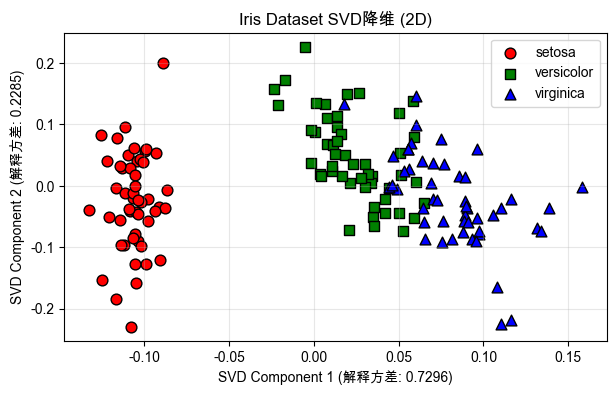

In [57]:
# 5. 可视化降维结果
plt.figure(figsize=(7, 4))
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']

for i, (color, marker, label) in enumerate(zip(colors, markers, target_names)):
    plt.scatter(
        X_svd[y == i, 0], X_svd[y == i, 1],
        c=color, marker=marker, label=label,
        edgecolor='black', s=60
    )

plt.xlabel(f'SVD Component 1 (解释方差: {explained_variance[0]:.4f})')
plt.ylabel(f'SVD Component 2 (解释方差: {explained_variance[1]:.4f})')
plt.title('Iris Dataset SVD降维 (2D)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [59]:
# 6. 输出降维后的数据
df_svd = pd.DataFrame(
    X_svd, columns=[f'SVD_Component_{i+1}' for i in range(k)]
)
df_svd['Species'] = [target_names[i] for i in y]
print("降维后前5行数据：")
print(df_svd.head())

降维后前5行数据：
   SVD_Component_1  SVD_Component_2 Species
0        -0.108240        -0.040996  setosa
1        -0.099458         0.057573  setosa
2        -0.112996         0.029200  setosa
3        -0.109897         0.051019  setosa
4        -0.114220        -0.055242  setosa
